<a href="https://colab.research.google.com/github/HACKERDRUNK/coding-interview-university/blob/main/Insurance_Claims_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#import some necessary lib
import sys

assert sys.version_info >=(3,7)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Dowload and prepare data
data = pd.read_csv('/content/InsuranceDataset.csv')
# Create training and test sets

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import math as m
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, mean_squared_error



In [16]:
# Download the data from a file
df=pd.read_csv('InsuranceDataset.csv')
df

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,"72,433"
1,55.0,female,South NT,29.5,2.0,no,occasional,"79,358"
2,53.0,female,North NT,26.0,0.0,no,frequent,"67,628"
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,"7,020"
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,"82,368"
...,...,...,...,...,...,...,...,...
1336,56.0,male,Hong Kong Island,38.5,0.0,no,no,"73,688"
1337,24.0,female,North NT,32.1,0.0,no,occasional,"17,955"
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info

<bound method DataFrame.info of        age     sex              home   bmi  children smoker    drinking  \
0     49.0  female           Kowloon  32.3       2.0     no          no   
1     55.0  female          South NT  29.5       2.0     no  occasional   
2     53.0  female          North NT  26.0       0.0     no    frequent   
3     19.0    male  Hong Kong Island  33.2       0.0     no  occasional   
4     59.0    male  Hong Kong Island  36.5       1.0     no    frequent   
...    ...     ...               ...   ...       ...    ...         ...   
1336  56.0    male  Hong Kong Island  38.5       0.0     no          no   
1337  24.0  female          North NT  32.1       0.0     no  occasional   
1338   NaN     NaN               NaN   NaN       NaN    NaN         NaN   
1339   NaN     NaN               NaN   NaN       NaN    NaN         NaN   
1340   NaN     NaN               NaN   NaN       NaN    NaN         NaN   

     past claims  
0         72,433  
1         79,358  
2         

In [5]:
df['past claims']=df['past claims'].map(lambda x:str(x).replace(',',''))
df['past claims']=df['past claims'].astype(float)
df



,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,72433.0
1,55.0,female,South NT,29.5,2.0,no,occasional,79358.0
2,53.0,female,North NT,26.0,0.0,no,frequent,67628.0
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,7020.0
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,82368.0
...,...,...,...,...,...,...,...,...
1336,56.0,male,Hong Kong Island,38.5,0.0,no,no,73688.0
1337,24.0,female,North NT,32.1,0.0,no,occasional,17955.0
1338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info

<bound method DataFrame.info of        age     sex              home   bmi  children smoker    drinking  \
0     49.0  female           Kowloon  32.3       2.0     no          no   
1     55.0  female          South NT  29.5       2.0     no  occasional   
2     53.0  female          North NT  26.0       0.0     no    frequent   
3     19.0    male  Hong Kong Island  33.2       0.0     no  occasional   
4     59.0    male  Hong Kong Island  36.5       1.0     no    frequent   
...    ...     ...               ...   ...       ...    ...         ...   
1336  56.0    male  Hong Kong Island  38.5       0.0     no          no   
1337  24.0  female          North NT  32.1       0.0     no  occasional   
1338   NaN     NaN               NaN   NaN       NaN    NaN         NaN   
1339   NaN     NaN               NaN   NaN       NaN    NaN         NaN   
1340   NaN     NaN               NaN   NaN       NaN    NaN         NaN   

      past claims  
0         72433.0  
1         79358.0  
2      

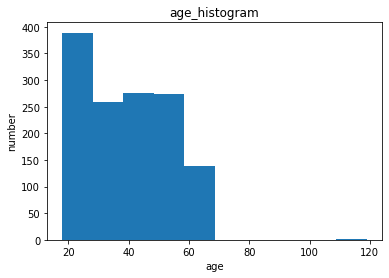

In [12]:
plt.hist(df['age'],bins=10)
plt.title('age_histogram')
plt.xlabel('age')
plt.ylabel('number')
plt.show()

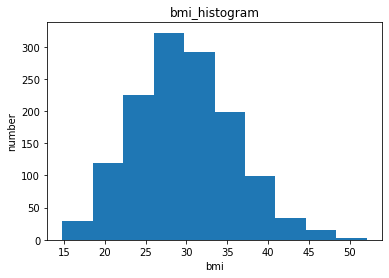

In [8]:
plt.hist(df['bmi'],bins=10)
plt.title('bmi_histogram')
plt.xlabel('bmi')
plt.ylabel('number')
plt.show()

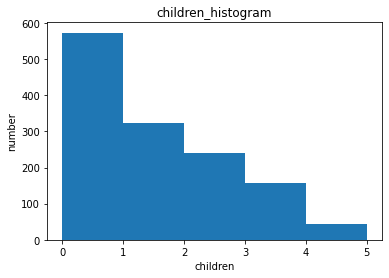

In [9]:
plt.hist(df['children'],bins=5)
plt.title('children_histogram')
plt.xlabel('children')
plt.ylabel('number')
plt.show()

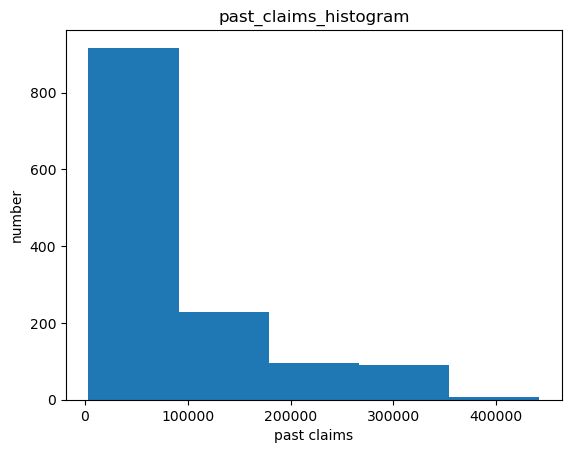

In [ ]:
plt.hist(df['past claims'],bins=5)
plt.title('past_claims_histogram')
plt.xlabel('past claims')
plt.ylabel('number')
plt.show()

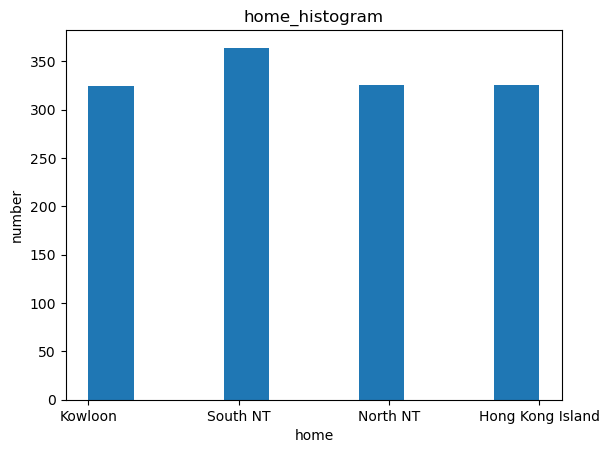

In [ ]:
plt.hist(df['home'])
plt.title('home_histogram')
plt.xlabel('home')
plt.ylabel('number')
plt.show()

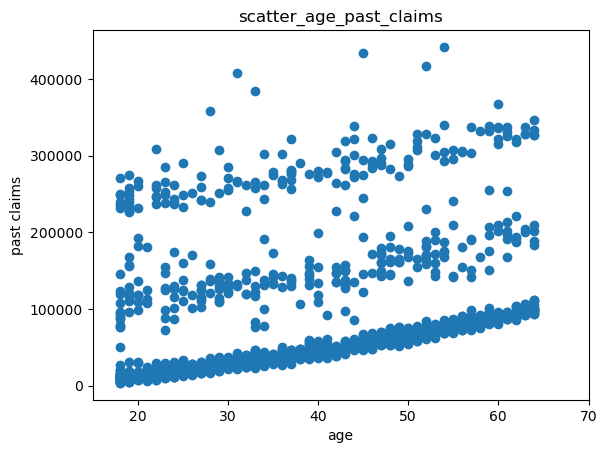

In [ ]:
plt.scatter(df['age'],df['past claims'])
plt.title('scatter_age_past_claims')
plt.xlabel('age')
plt.ylabel('past claims')
plt.xlim(15,70)
plt.show()

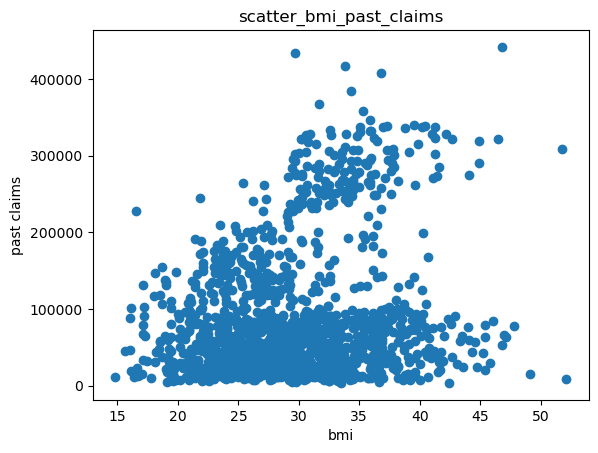

In [ ]:
plt.scatter(df['bmi'],df['past claims'])
plt.title('scatter_bmi_past_claims')
plt.xlabel('bmi')
plt.ylabel('past claims')
plt.show()

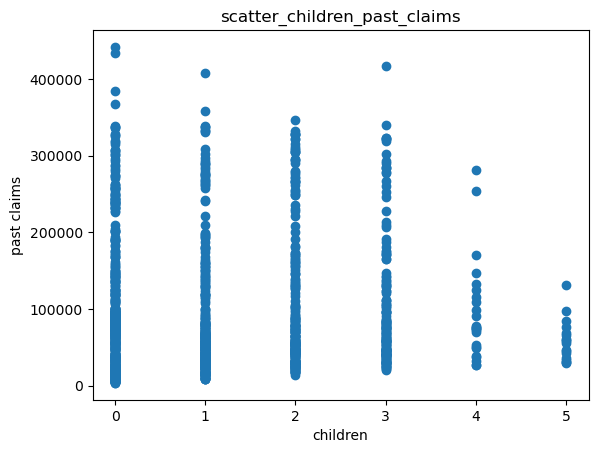

In [ ]:
plt.scatter(df['children'],df['past claims'])
plt.title('scatter_children_past_claims')
plt.xlabel('children')
plt.ylabel('past claims')
plt.show()

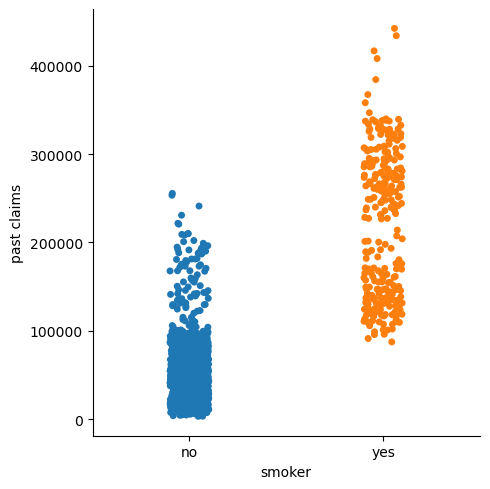

In [ ]:
sns.catplot(x="smoker", y="past claims", data=df)

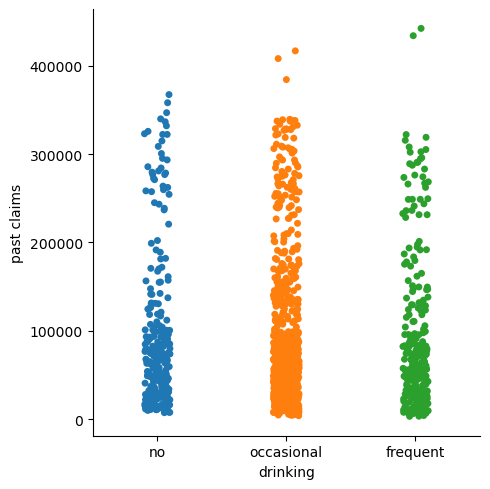

In [ ]:
sns.catplot(x="drinking", y="past claims", data=df)

In [ ]:
home_map=dict()
i=0
for home_name in set(df['home']):
    home_map[home_name]=i
    i+=1

sex_map=dict()
i=0
for sex_name in set(df['sex']):
    sex_map[sex_name]=i
    i+=1

drinking_map=dict()
i=0
for drinking_name in set(df['drinking']):
    drinking_map[drinking_name]=i
    i+=1
    
smoker_map=dict()
i=0
for smoker_name in set(df['smoker']):
    smoker_map[smoker_name]=i
    i+=1

In [ ]:
home_map

{'Hong Kong Island': 0, 'North NT': 1, 'Kowloon': 2, 'South NT': 3}

In [ ]:
sex_map

{'male': 0, 'female': 1}

In [ ]:
drinking_map

{'occasional': 0, 'frequent': 1, 'no': 2}

In [ ]:
smoker_map

{'yes': 0, 'no': 1}

In [ ]:
df

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49,female,Kowloon,32.3,2.0,no,no,72433.0
1,55,female,South NT,29.5,2.0,no,occasional,79358.0
2,53,female,North NT,26.0,0.0,no,frequent,67628.0
3,19,male,Hong Kong Island,33.2,0.0,no,occasional,7020.0
4,59,male,Hong Kong Island,36.5,1.0,no,frequent,82368.0
...,...,...,...,...,...,...,...,...
1333,19,female,Hong Kong Island,31.8,0.0,no,no,11676.0
1334,54,male,North NT,32.4,1.0,no,occasional,74355.0
1335,30,male,North NT,27.9,3.0,yes,occasional,142256.0
1336,56,male,Hong Kong Island,38.5,0.0,no,no,73688.0


In [ ]:
df['home']=df['home'].map(home_map)
df['sex']=df['sex'].map(sex_map)
df['drinking']=df['drinking'].map(drinking_map)
df['smoker']=df['smoker'].map(smoker_map)
df.dropna(inplace=True)
df

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49,1,2,32.3,2.0,1,2,72433.0
1,55,1,3,29.5,2.0,1,0,79358.0
2,53,1,1,26.0,0.0,1,1,67628.0
3,19,0,0,33.2,0.0,1,0,7020.0
4,59,0,0,36.5,1.0,1,1,82368.0
...,...,...,...,...,...,...,...,...
1333,19,1,0,31.8,0.0,1,2,11676.0
1334,54,0,1,32.4,1.0,1,0,74355.0
1335,30,0,1,27.9,3.0,0,0,142256.0
1336,56,0,0,38.5,0.0,1,2,73688.0


In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3)
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            past claims   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     392.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          7.29e-272
Time:                        16:24:44   Log-Likelihood:                -11290.
No. Observations:                 934   AIC:                         2.260e+04
Df Residuals:                     926   BIC:                         2.264e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.14e+04   8472.059      9.608      0.000    6.48e+04     9.8e+04
age         1808.8099     99.265     18.222      0.000    1613.999    2003.621
sex        -1451.7165   2843.357     -0.511      0.610   -7031.887    4128.454
home        -674.0126   1288.733     -0.523      0.601   -3203.188    1855.163
bmi         2259.7557    236.461      9.557      0.000    1795.693    2723.818
children    3732.8904   1180.811      3.161      0.002    1415.514    6050.267
smoker     -1.661e+05   3471.767    -47.851      0.000   -1.73e+05   -1.59e+05
drinking     766.3523   1780.724      0.430      0.667   -2728.371    4261.075
==============================================================================
Omnibus:                      198.284   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.442
Skew:                           1.132   Prob(JB):                    2.57e-103
Kurtosis:                       5.649   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# from the graph we can see that, the variable sex and drinking didn't pass the T test, so we remove the two variables and do the ols again

In [ ]:
X_train.pop('drinking')
X_train.pop('sex')
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            past claims   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     549.9
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.65e-274
Time:                        16:24:47   Log-Likelihood:                -11291.
No. Observations:                 934   AIC:                         2.259e+04
Df Residuals:                     928   BIC:                         2.262e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.095e+04   8311.755      9.739      0.000    6.46e+04    9.73e+04
age         1807.3988     99.154     18.228      0.000    1612.807    2001.991
home        -681.6537   1286.868     -0.530      0.596   -3207.162    1843.854
bmi         2271.4744    235.522      9.644      0.000    1809.257    2733.692
children    3739.3251   1177.119      3.177      0.002    1429.202    6049.448
smoker     -1.663e+05   3458.669    -48.068      0.000   -1.73e+05   -1.59e+05
==============================================================================
Omnibus:                      197.767   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.481
Skew:                           1.130   Prob(JB):                    1.13e-102
Kurtosis:                       5.637   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# now we find the variable home didn't cross T test, so we remove it

In [ ]:
X_train.pop('home')
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            past claims   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     687.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          6.81e-276
Time:                        16:26:00   Log-Likelihood:                -11291.
No. Observations:                 934   AIC:                         2.259e+04
Df Residuals:                     929   BIC:                         2.262e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.05e+04   8265.345      9.740      0.000    6.43e+04    9.67e+04
age         1808.4712     99.095     18.250      0.000    1613.995    2002.947
bmi         2245.9174    230.438      9.746      0.000    1793.679    2698.156
children    3755.3541   1176.274      3.193      0.001    1446.892    6063.816
smoker     -1.661e+05   3448.626    -48.170      0.000   -1.73e+05   -1.59e+05
==============================================================================
Omnibus:                      197.273   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.773
Skew:                           1.128   Prob(JB):                    2.66e-102
Kurtosis:                       5.632   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# from the process we can find that, when we ignore the variables, the F-statistic of the whole model improve, and now all the variable in the model crose the T test